$$\textrm{Joaquin Peñuela Parra}$$
$$\textrm{University of Los Andes}$$
$$\textrm{High Energy Physics Group: Phenomenology of Particles}$$

$\textbf{Preliminaries}$ 

The libraries used here are:

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["font.family"] = "serif"
format_figures = 'pdf'

In [2]:
Path_parton_analysis = os.path.dirname(os.path.realpath('XS_Plots.ipynb'))
Path_Leptoquarks_searches = os.path.dirname(Path_parton_analysis)
Path_Selected_Events = f'{Path_Leptoquarks_searches}/03_delphes_preselection/Selected_Events'

In [3]:
Path_Selected_Events

'/disco4/personal_folders/Joaquin/2023/Semanas_13_14_15/Leptoquarks_Searches_2023/03_delphes_preselection/Selected_Events'

In [4]:
processes = ['b_b_tau_tau', 'b_tau_tau']
channels = ['hadronic', 'semileptonic']
signals = ['Tau_LQ', 'LQ_LQ']
Masses = ['0250', '0500', '0750','1000', '1250', '1500', '1750', '2000', '2250', '2500']

Let's plot XS (for g_U = 1.8) as a function of the mass of LQ. We must interprolate the files that are inside XS_Matrixes

In [5]:
XS = {r'$\beta_{R}^{b \tau} = -1$': {}, r'$\beta_{R}^{b \tau} = 0$': {}}

process,channel = 'b_b_tau_tau', 'hadronic'

In [6]:
from scipy.interpolate import griddata

In [7]:
Data_betard33_0 = {}
for signal in signals:
    ruta = f'{Path_parton_analysis}/XS_Matrixes/woRHC/Data_5K_13_TeV_{signal}.xlsx'
    
    #Lectura e interpolación:
    Data = pd.read_excel(ruta, index_col= 0)
    Data.columns = [float(i) for i in Data.columns]
    Data.index = [float(i) for i in Data.index]  
    
    index = Data.index #Etiquetas de las columnas del DataFrame
    columns = Data.columns #Etiquetas de las filas del DataFrame
        
    matriz = np.zeros([len(columns)*len(index),3])
    columna_0 = []
    for i in range(len(columns)):
        for j in range(len(index)):
            columna_0.append(columns[i])
    columna_1 = []
    for j in range(len(columns)):
        for i in range(len(index)):
            columna_1.append(index[i])
    matriz[:,0] = columna_0
    matriz[:,1] = columna_1

    for k in range(len(matriz[:,2])):
        matriz[k,2] = Data[matriz[k,0]][matriz[k,1]]

    Data = pd.DataFrame(matriz) #Se redefine los datos usando la estructura anteriormente explicada
    Data.columns = ["A", "B", "F(A,B)"] #Formato de tres columnas, se puede pensar como si fueran dos variables independientes A, B y una función F(A,B)
    
    x = [float(M) for M in Masses]
    y = [1.8]
    
    gridx, gridy = np.meshgrid(x,y)
    Data_interpolada = pd.DataFrame(griddata((Data['A'].values,Data['B'].values), Data['F(A,B)'].values, (gridx,gridy), method='cubic'))
    Data_interpolada.index = y
    Data_interpolada.columns = x
    
    #Aquí ya tenemos los valores para 1.8
    
    Data_betard33_0[f'Data_5K_13_TeV_{signal}'] = Data_interpolada

    xs = list(np.transpose(Data_betard33_0[f'Data_5K_13_TeV_{signal}'])[1.8])
    lista_M = list(np.transpose(Data_betard33_0[f'Data_5K_13_TeV_{signal}']).index)

    matriz = np.zeros([len(lista_M), 2])
    matriz[:,0] = lista_M
    matriz[:,1] = xs
    matriz = pd.DataFrame(matriz)

    XS[r'$\beta_{R}^{b \tau} = 0$'][signal] = matriz

In [8]:
Data_Betard33_minus1 = {}
for signal in signals:
    ruta = f'{Path_parton_analysis}/XS_Matrixes/wRHC/Data_5K_13_TeV_{signal}.xlsx'
    
    #Lectura e interpolación:
    Data = pd.read_excel(ruta, index_col= 0)
    Data.columns = [float(i) for i in Data.columns]
    Data.index = [float(i) for i in Data.index]  
    
    index = Data.index #Etiquetas de las columnas del DataFrame
    columns = Data.columns #Etiquetas de las filas del DataFrame
        
    matriz = np.zeros([len(columns)*len(index),3])
    columna_0 = []
    for i in range(len(columns)):
        for j in range(len(index)):
            columna_0.append(columns[i])
    columna_1 = []
    for j in range(len(columns)):
        for i in range(len(index)):
            columna_1.append(index[i])
    matriz[:,0] = columna_0
    matriz[:,1] = columna_1

    for k in range(len(matriz[:,2])):
        matriz[k,2] = Data[matriz[k,0]][matriz[k,1]]

    Data = pd.DataFrame(matriz) #Se redefine los datos usando la estructura anteriormente explicada
    Data.columns = ["A", "B", "F(A,B)"] #Formato de tres columnas, se puede pensar como si fueran dos variables independientes A, B y una función F(A,B)
    
    x = [float(M) for M in Masses]
    y = [1.8]
    
    gridx, gridy = np.meshgrid(x,y)
    Data_interpolada = pd.DataFrame(griddata((Data['A'].values,Data['B'].values), Data['F(A,B)'].values, (gridx,gridy), method='cubic'))
    Data_interpolada.index = y
    Data_interpolada.columns = x
    
    #Aquí ya tenemos los valores para 1.8
    
    Data_Betard33_minus1[f'Data_5K_13_TeV_{signal}'] = Data_interpolada

    xs = list(np.transpose(Data_Betard33_minus1[f'Data_5K_13_TeV_{signal}'])[1.8])
    lista_M = list(np.transpose(Data_Betard33_minus1[f'Data_5K_13_TeV_{signal}']).index)

    matriz = np.zeros([len(lista_M), 2])
    matriz[:,0] = lista_M
    matriz[:,1] = xs
    matriz = pd.DataFrame(matriz)

    XS[r'$\beta_{R}^{b \tau} = -1$'][signal] = matriz

Finally, we can build the graph:

Text(1.0, 1.0, '$\\mathbf{\\sqrt{s} = 13 TeV, g_{U} = 1.8}$')

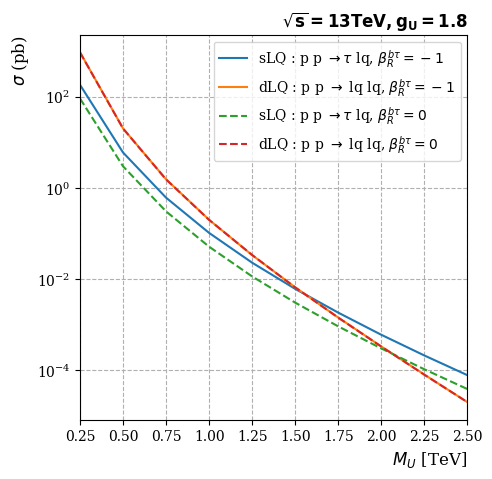

In [9]:
linestyles = ['-', '--']

fig = plt.figure(figsize = (5,5))

for i in range(len(list(XS.keys()))):
    betard = list(XS.keys())[i]
    
    for signal in signals:
        etiqueta = signal.replace('Tau_LQ', r'sLQ : p p $\rightarrow \tau$ lq').replace('LQ_LQ', r'dLQ : p p $\rightarrow$ lq lq') + f', {betard}'
        plt.plot(XS[betard][signal][0]/1000, XS[betard][signal][1], linestyle = linestyles[i],label = etiqueta) 

plt.grid(True, linestyle = '--')
plt.yscale('log')    
plt.xlabel(r'$M_{U}$ [TeV]', loc= 'right', fontsize = 12)
plt.ylabel(r'$\sigma $ (pb)', loc = 'top', fontsize = 12)
plt.legend()

plt.xlim(np.min(lista_M)/1000, np.max(lista_M)/1000)

plt.title(r'$\mathbf{\sqrt{s} = 13 TeV, g_{U} = 1.8}$', fontweight='bold', loc = 'right')
#plt.savefig(f'prod_cross_section_13TeV.{format_figures}', dpi = 300, bbox_inches='tight')

Let's repeat this for 13.6:

In [10]:
XS = {r'$\beta_{R} = -1$': {}, r'$\beta_{R} = 0$': {}}

In [11]:
Data_betard33_0 = {}
for signal in signals:
    ruta = f'{Path_parton_analysis}/XS_Matrixes/woRHC/Data_5K_13_6_TeV_{signal}.xlsx'
    
    #Lectura e interpolación:
    Data = pd.read_excel(ruta, index_col= 0)
    Data.columns = [float(i) for i in Data.columns]
    Data.index = [float(i) for i in Data.index]  
    
    index = Data.index #Etiquetas de las columnas del DataFrame
    columns = Data.columns #Etiquetas de las filas del DataFrame
        
    matriz = np.zeros([len(columns)*len(index),3])
    columna_0 = []
    for i in range(len(columns)):
        for j in range(len(index)):
            columna_0.append(columns[i])
    columna_1 = []
    for j in range(len(columns)):
        for i in range(len(index)):
            columna_1.append(index[i])
    matriz[:,0] = columna_0
    matriz[:,1] = columna_1

    for k in range(len(matriz[:,2])):
        matriz[k,2] = Data[matriz[k,0]][matriz[k,1]]

    Data = pd.DataFrame(matriz) #Se redefine los datos usando la estructura anteriormente explicada
    Data.columns = ["A", "B", "F(A,B)"] #Formato de tres columnas, se puede pensar como si fueran dos variables independientes A, B y una función F(A,B)
    
    x = [float(M) for M in Masses]
    y = [1.8]
    
    gridx, gridy = np.meshgrid(x,y)
    Data_interpolada = pd.DataFrame(griddata((Data['A'].values,Data['B'].values), Data['F(A,B)'].values, (gridx,gridy), method='cubic'))
    Data_interpolada.index = y
    Data_interpolada.columns = x
    
    #Aquí ya tenemos los valores para 1.8
    
    Data_betard33_0[f'Data_5K_13_6_TeV_{signal}'] = Data_interpolada

    xs = list(np.transpose(Data_betard33_0[f'Data_5K_13_6_TeV_{signal}'])[1.8])
    lista_M = list(np.transpose(Data_betard33_0[f'Data_5K_13_6_TeV_{signal}']).index)

    matriz = np.zeros([len(lista_M), 2])
    matriz[:,0] = lista_M
    matriz[:,1] = xs
    matriz = pd.DataFrame(matriz)

    XS[r'$\beta_{R} = 0$'][signal] = matriz

In [12]:
Data_Betard33_minus1 = {}
for signal in signals:
    ruta = f'{Path_parton_analysis}/XS_Matrixes/wRHC/Data_5K_13_6_TeV_{signal}.xlsx'
    
    #Lectura e interpolación:
    Data = pd.read_excel(ruta, index_col= 0)
    Data.columns = [float(i) for i in Data.columns]
    Data.index = [float(i) for i in Data.index]  
    
    index = Data.index #Etiquetas de las columnas del DataFrame
    columns = Data.columns #Etiquetas de las filas del DataFrame
        
    matriz = np.zeros([len(columns)*len(index),3])
    columna_0 = []
    for i in range(len(columns)):
        for j in range(len(index)):
            columna_0.append(columns[i])
    columna_1 = []
    for j in range(len(columns)):
        for i in range(len(index)):
            columna_1.append(index[i])
    matriz[:,0] = columna_0
    matriz[:,1] = columna_1

    for k in range(len(matriz[:,2])):
        matriz[k,2] = Data[matriz[k,0]][matriz[k,1]]

    Data = pd.DataFrame(matriz) #Se redefine los datos usando la estructura anteriormente explicada
    Data.columns = ["A", "B", "F(A,B)"] #Formato de tres columnas, se puede pensar como si fueran dos variables independientes A, B y una función F(A,B)
    
    x = [float(M) for M in Masses]
    y = [1.8]
    
    gridx, gridy = np.meshgrid(x,y)
    Data_interpolada = pd.DataFrame(griddata((Data['A'].values,Data['B'].values), Data['F(A,B)'].values, (gridx,gridy), method='cubic'))
    Data_interpolada.index = y
    Data_interpolada.columns = x
    
    #Aquí ya tenemos los valores para 1.8
    
    Data_Betard33_minus1[f'Data_5K_13_6_TeV_{signal}'] = Data_interpolada

    xs = list(np.transpose(Data_Betard33_minus1[f'Data_5K_13_6_TeV_{signal}'])[1.8])
    lista_M = list(np.transpose(Data_Betard33_minus1[f'Data_5K_13_6_TeV_{signal}']).index)

    matriz = np.zeros([len(lista_M), 2])
    matriz[:,0] = lista_M
    matriz[:,1] = xs
    matriz = pd.DataFrame(matriz)

    XS[r'$\beta_{R} = -1$'][signal] = matriz

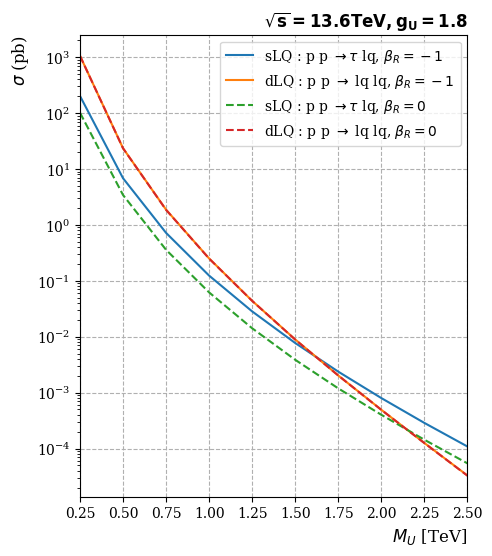

In [13]:
linestyles = ['-', '--']

fig = plt.figure(figsize = (5,6))

for i in range(len(list(XS.keys()))):
    betard = list(XS.keys())[i]
    
    for signal in signals:
        etiqueta = signal.replace('Tau_LQ', r'sLQ : p p $\rightarrow \tau$ lq').replace('LQ_LQ', r'dLQ : p p $\rightarrow$ lq lq') + f', {betard}'
        plt.plot(XS[betard][signal][0]/1000, XS[betard][signal][1], linestyle = linestyles[i],label = etiqueta) 

plt.grid(True, linestyle = '--')
plt.yscale('log')    
plt.xlabel(r'$M_{U}$ [TeV]', loc= 'right', fontsize = 12)
plt.ylabel(r'$\sigma $ (pb)', loc = 'top', fontsize = 12)
plt.legend()

plt.xlim(np.min(lista_M)/1000, np.max(lista_M)/1000)

plt.title(r'$\mathbf{\sqrt{s} = 13.6 TeV, g_{U} = 1.8}$', fontweight='bold', loc = 'right')
plt.savefig(f'prod_cross_section_13_6TeV.{format_figures}', bbox_inches='tight')